In [1]:
import numpy as np
import pandas as pd
from datetime import datetime

In [2]:
### Loading the Dataset
df=pd.read_csv('./Oakland_Auto_Theft.csv')
df.head(5)

,CrimeType,DateTime,CaseNumber,Description,PoliceBeat,Address,City,State,Location
0,TOWED VEHICLE,09/30/2022 11:18:00 PM,22-044865,VEHICLE THEFT - AUTO,31Y,9609 MADDUX DR,Oakland,CA,POINT (-122.186243032 37.736909007)
1,ROBBERY,10/05/2022 03:00:00 AM,22-045645,VEHICLE THEFT - AUTO,06X,2420 SAN PABLO AV,Oakland,CA,POINT (-122.274354017 37.81511099)
2,STOLEN VEHICLE,11/27/2013 11:30:00 AM,13-060701,VEHICLE THEFT - AUTO,16Y,1123 EL CENTRO AV,Oakland,CA,POINT (-122.219454982 37.810370982)
3,OTHER,12/19/2013 11:00:00 PM,13-064501,VEHICLE THEFT - AUTO,32Y,2374 108TH AV,Oakland,CA,POINT (-122.153223028 37.740880981)
4,STOLEN VEHICLE,01/28/2014 11:00:00 AM,14-004979,VEHICLE THEFT - AUTO,07X,3129 SAN PABLO AV,Oakland,CA,POINT (-122.277448029 37.822463008)


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 152727 entries, 0 to 152726
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   CrimeType    149889 non-null  object
 1   DateTime     152727 non-null  object
 2   CaseNumber   152727 non-null  object
 3   Description  152727 non-null  object
 4   PoliceBeat   152196 non-null  object
 5   Address      152677 non-null  object
 6   City         152727 non-null  object
 7   State        152727 non-null  object
 8   Location     152726 non-null  object
dtypes: object(9)
memory usage: 10.5+ MB


In [4]:
### Convert string DateTime to DateTime type object
df['DateTime'] = pd.to_datetime(df['DateTime'])

/var/folders/pz/dkgytm896n7bpqylxn48gl1m0000gn/T/ipykernel_5304/3175685190.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['DateTime'] = pd.to_datetime(df['DateTime'])


In [5]:
### Split Day, Month, Year, Hour in DateTime object
df['Day'] = df['DateTime'].dt.day
df['Month']= df['DateTime'].dt.month
df['Year']= df['DateTime'].dt.year
df['Hour']= df['DateTime'].dt.hour
df['DayOfWeek']= df['DateTime'].dt.weekday
df["DayOfWeekName"]= df['DateTime'].dt.strftime('%A')

In [6]:
### Dropping non-important features
df.drop(['CaseNumber', 'DateTime', 'Description', 'City', 'State'], axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 152727 entries, 0 to 152726
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   CrimeType      149889 non-null  object
 1   PoliceBeat     152196 non-null  object
 2   Address        152677 non-null  object
 3   Location       152726 non-null  object
 4   Day            152727 non-null  int32 
 5   Month          152727 non-null  int32 
 6   Year           152727 non-null  int32 
 7   Hour           152727 non-null  int32 
 8   DayOfWeek      152727 non-null  int32 
 9   DayOfWeekName  152727 non-null  object
dtypes: int32(5), object(5)
memory usage: 8.7+ MB


In [7]:
df.head(5)

,CrimeType,PoliceBeat,Address,Location,Day,Month,Year,Hour,DayOfWeek,DayOfWeekName
0,TOWED VEHICLE,31Y,9609 MADDUX DR,POINT (-122.186243032 37.736909007),30,9,2022,23,4,Friday
1,ROBBERY,06X,2420 SAN PABLO AV,POINT (-122.274354017 37.81511099),5,10,2022,3,2,Wednesday
2,STOLEN VEHICLE,16Y,1123 EL CENTRO AV,POINT (-122.219454982 37.810370982),27,11,2013,11,2,Wednesday
3,OTHER,32Y,2374 108TH AV,POINT (-122.153223028 37.740880981),19,12,2013,23,3,Thursday
4,STOLEN VEHICLE,07X,3129 SAN PABLO AV,POINT (-122.277448029 37.822463008),28,1,2014,11,1,Tuesday


In [8]:
### Split the location to X, Y coordinates
df[['Point','X', 'Y']] = df['Location'].str.split(' ', expand= True)

In [9]:
### Remove "(" ")" from X and Y columns
### Drop unnecessary 'Point' columns
df['X']= df['X'].str.slice(1)
df['Y'] = df['Y'].str.rstrip(')')
df.drop('Point', axis = 1, inplace= True)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 152727 entries, 0 to 152726
Data columns (total 12 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   CrimeType      149889 non-null  object
 1   PoliceBeat     152196 non-null  object
 2   Address        152677 non-null  object
 3   Location       152726 non-null  object
 4   Day            152727 non-null  int32 
 5   Month          152727 non-null  int32 
 6   Year           152727 non-null  int32 
 7   Hour           152727 non-null  int32 
 8   DayOfWeek      152727 non-null  int32 
 9   DayOfWeekName  152727 non-null  object
 10  X              152726 non-null  object
 11  Y              152726 non-null  object
dtypes: int32(5), object(7)
memory usage: 11.1+ MB


In [11]:
df.head(5)

,CrimeType,PoliceBeat,Address,Location,Day,Month,Year,Hour,DayOfWeek,DayOfWeekName,X,Y
0,TOWED VEHICLE,31Y,9609 MADDUX DR,POINT (-122.186243032 37.736909007),30,9,2022,23,4,Friday,-122.186243032,37.736909007
1,ROBBERY,06X,2420 SAN PABLO AV,POINT (-122.274354017 37.81511099),5,10,2022,3,2,Wednesday,-122.274354017,37.81511099
2,STOLEN VEHICLE,16Y,1123 EL CENTRO AV,POINT (-122.219454982 37.810370982),27,11,2013,11,2,Wednesday,-122.219454982,37.810370982
3,OTHER,32Y,2374 108TH AV,POINT (-122.153223028 37.740880981),19,12,2013,23,3,Thursday,-122.153223028,37.740880981
4,STOLEN VEHICLE,07X,3129 SAN PABLO AV,POINT (-122.277448029 37.822463008),28,1,2014,11,1,Tuesday,-122.277448029,37.822463008


In [12]:
### Remove Location column
df.drop('Location', axis = 1, inplace= True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 152727 entries, 0 to 152726
Data columns (total 11 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   CrimeType      149889 non-null  object
 1   PoliceBeat     152196 non-null  object
 2   Address        152677 non-null  object
 3   Day            152727 non-null  int32 
 4   Month          152727 non-null  int32 
 5   Year           152727 non-null  int32 
 6   Hour           152727 non-null  int32 
 7   DayOfWeek      152727 non-null  int32 
 8   DayOfWeekName  152727 non-null  object
 9   X              152726 non-null  object
 10  Y              152726 non-null  object
dtypes: int32(5), object(6)
memory usage: 9.9+ MB


In [13]:
# df = df[(df['Year'] >= 2020) & (df['Year'] <= 2023)]
df.head(3)

,CrimeType,PoliceBeat,Address,Day,Month,Year,Hour,DayOfWeek,DayOfWeekName,X,Y
0,TOWED VEHICLE,31Y,9609 MADDUX DR,30,9,2022,23,4,Friday,-122.186243032,37.736909007
1,ROBBERY,06X,2420 SAN PABLO AV,5,10,2022,3,2,Wednesday,-122.274354017,37.81511099
2,STOLEN VEHICLE,16Y,1123 EL CENTRO AV,27,11,2013,11,2,Wednesday,-122.219454982,37.810370982


In [14]:
!pip install geopandas

In [15]:
import geopandas
from shapely.geometry import Point

In [16]:
df['geometry'] = df.apply(lambda row: Point(row['X'], row['Y']), axis=1)

In [17]:
df.head(2)

,CrimeType,PoliceBeat,Address,Day,Month,Year,Hour,DayOfWeek,DayOfWeekName,X,Y,geometry
0,TOWED VEHICLE,31Y,9609 MADDUX DR,30,9,2022,23,4,Friday,-122.186243032,37.736909007,POINT (-122.186243032 37.736909007)
1,ROBBERY,06X,2420 SAN PABLO AV,5,10,2022,3,2,Wednesday,-122.274354017,37.81511099,POINT (-122.274354017 37.81511099)


In [18]:
geo_police_data = geopandas.GeoDataFrame(df, geometry='geometry')
geo_police_data.crs = {'init': 'epsg:4326'}
geo_police_data.head(2)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


,CrimeType,PoliceBeat,Address,Day,Month,Year,Hour,DayOfWeek,DayOfWeekName,X,Y,geometry
0,TOWED VEHICLE,31Y,9609 MADDUX DR,30,9,2022,23,4,Friday,-122.186243032,37.736909007,POINT (-122.18624 37.73691)
1,ROBBERY,06X,2420 SAN PABLO AV,5,10,2022,3,2,Wednesday,-122.274354017,37.81511099,POINT (-122.27435 37.81511)


In [19]:
oakland_districts = geopandas.read_file('oakland.geojson')
oakland_districts.crs = {'init': 'epsg:4326'}
oakland_districts = oakland_districts.set_geometry('geometry')

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


In [20]:
df= geopandas.tools.sjoin(geo_police_data, oakland_districts,how='left')
df.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 152727 entries, 0 to 152726
Data columns (total 15 columns):
 #   Column         Non-Null Count   Dtype   
---  ------         --------------   -----   
 0   CrimeType      149889 non-null  object  
 1   PoliceBeat     152196 non-null  object  
 2   Address        152677 non-null  object  
 3   Day            152727 non-null  int32   
 4   Month          152727 non-null  int32   
 5   Year           152727 non-null  int32   
 6   Hour           152727 non-null  int32   
 7   DayOfWeek      152727 non-null  int32   
 8   DayOfWeekName  152727 non-null  object  
 9   X              152726 non-null  object  
 10  Y              152726 non-null  object  
 11  geometry       152727 non-null  geometry
 12  index_right    152135 non-null  float64 
 13  Name           152135 non-null  object  
 14  Descriptio     0 non-null       object  
dtypes: float64(1), geometry(1), int32(5), object(8)
memory usage: 15.7+ MB


In [21]:
df.drop(['index_right', 'Descriptio'], axis= 1, inplace= True)

In [22]:
df.rename(columns={"Name": "District"}, inplace=True)
df.head(3)

,CrimeType,PoliceBeat,Address,Day,Month,Year,Hour,DayOfWeek,DayOfWeekName,X,Y,geometry,District
0,TOWED VEHICLE,31Y,9609 MADDUX DR,30,9,2022,23,4,Friday,-122.186243032,37.736909007,POINT (-122.18624 37.73691),7
1,ROBBERY,06X,2420 SAN PABLO AV,5,10,2022,3,2,Wednesday,-122.274354017,37.81511099,POINT (-122.27435 37.81511),3
2,STOLEN VEHICLE,16Y,1123 EL CENTRO AV,27,11,2013,11,2,Wednesday,-122.219454982,37.810370982,POINT (-122.21945 37.81037),5


In [23]:
# Code to get the unique frequencies of crime for every single hour in the year 2023

# Convert District column to float
df['District'] = df['District'].astype(float)

frequency_set = set()
frequency_dict = {}

unique_years = {2020, 2021, 2022, 2023} # df['Year'].unique()

frequency_df = df[df['Year'].isin(unique_years)]

for year in unique_years:
    for month in range(1, 13):
        for day in range(1, 32):
            for hour in range(24):
                # Iterate over each district ranging from 1 to 7
                for district in range(1, 8):
                    # Filter the dataframe based on the current year, day, month, hour, and district
                    filtered_data = frequency_df[(frequency_df['Year'] == year) & 
                                         (frequency_df['Month'] == month) & 
                                         (frequency_df['Day'] == day) & 
                                         (frequency_df['Hour'] == hour) & 
                                         (frequency_df['District'] == district)]
                    
                    if not filtered_data.empty:
                        # print(f"Month: {month}, Day: {day}, Hour: {hour}, District: {district}")
                        # print(filtered_data.shape[0])
                        size = str(filtered_data.shape[0])
                        if size in frequency_dict.keys():
                            frequency_dict[str(size)] = frequency_dict[size] + 1
                        else:
                            frequency_dict[str(size)] = 1
                        frequency_set.add(size)
                        frequency_df.loc[(df['Year'] == year) & 
                           (df['Month'] == month) & 
                           (df['Day'] == day) & 
                           (df['Hour'] == hour) & 
                           (df['District'] == district), ['HourlyFrequency', 'Safe']] = (filtered_data.shape[0], 1) if int(size) <= 1 else (filtered_data.shape[0], 0)
                        

print(frequency_set)
print(frequency_dict)

{'10', '1', '5', '3', '7', '4', '2', '6', '8'}
{'3': 405, '1': 32228, '2': 3600, '4': 60, '5': 8, '7': 2, '10': 1, '6': 3, '8': 1}


In [24]:
frequency_df.head()

,CrimeType,PoliceBeat,Address,Day,Month,Year,Hour,DayOfWeek,DayOfWeekName,X,Y,geometry,District,HourlyFrequency,Safe
0,TOWED VEHICLE,31Y,9609 MADDUX DR,30,9,2022,23,4,Friday,-122.186243032,37.736909007,POINT (-122.18624 37.73691),7.0,2.0,0.0
1,ROBBERY,06X,2420 SAN PABLO AV,5,10,2022,3,2,Wednesday,-122.274354017,37.81511099,POINT (-122.27435 37.81511),3.0,1.0,1.0
6,STOLEN VEHICLE,27Y,1432 48TH AV,11,11,2022,19,4,Friday,-122.209015993,37.770539004,POINT (-122.20902 37.77054),5.0,1.0,1.0
7,STOLEN VEHICLE,10Y,1000 43RD ST,18,11,2022,22,4,Friday,-122.276607995,37.83385699,POINT (-122.27661 37.83386),1.0,1.0,1.0
8,RECOVERED O/S STOLEN,31Z,9907 BERNHARDT DR,1,12,2022,11,3,Thursday,-122.186819037,37.730416007,POINT (-122.18682 37.73042),7.0,2.0,0.0


In [25]:
df.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 152727 entries, 0 to 152726
Data columns (total 13 columns):
 #   Column         Non-Null Count   Dtype   
---  ------         --------------   -----   
 0   CrimeType      149889 non-null  object  
 1   PoliceBeat     152196 non-null  object  
 2   Address        152677 non-null  object  
 3   Day            152727 non-null  int32   
 4   Month          152727 non-null  int32   
 5   Year           152727 non-null  int32   
 6   Hour           152727 non-null  int32   
 7   DayOfWeek      152727 non-null  int32   
 8   DayOfWeekName  152727 non-null  object  
 9   X              152726 non-null  object  
 10  Y              152726 non-null  object  
 11  geometry       152727 non-null  geometry
 12  District       152135 non-null  float64 
dtypes: float64(1), geometry(1), int32(5), object(6)
memory usage: 17.4+ MB


In [26]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# columns that are not needed for prediction
df = frequency_df.drop(['CrimeType', 'PoliceBeat', 'Address', 'geometry', 'HourlyFrequency'], axis=1)

df.dropna(inplace=True)

# Convert categorical variables to numerical using one-hot encoding
df = pd.get_dummies(df, columns=['DayOfWeekName'])

X = df.drop('Safe', axis=1)
y = df['Safe']
accuracy_list= []
model_name=[]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
models = {
    "Random Forest": RandomForestClassifier(),
    "Logistic Regression": LogisticRegression(max_iter=100000),
    "Support Vector Machine": SVC(),
    "Decision Tree": DecisionTreeClassifier()
}

# Evaluation
for name, model in models.items():
    print(f"Training and evaluating {name}...")
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    model_name.append(name)
    accuracy_list.append(accuracy)
    print(f"Accuracy of {name}: {accuracy}")

Training and evaluating Random Forest...
Accuracy of Random Forest: 0.8185478950579622
Training and evaluating Logistic Regression...
Accuracy of Logistic Regression: 0.7814521049420379
Training and evaluating Support Vector Machine...
Accuracy of Support Vector Machine: 0.7814521049420379
Training and evaluating Decision Tree...
Accuracy of Decision Tree: 0.7122635753508236


In [27]:
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import AdaBoostClassifier
models = {
   "GuassianNB": GaussianNB(),
   "MLPClassifier":  MLPClassifier(),
   "SGDClassifier": SGDClassifier(),
   "AdaBoostClassifier": AdaBoostClassifier()
}

# Evaluation
for name, model in models.items():
    print(f"Training and evaluating {name}...")
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    model_name.append(name)
    accuracy_list.append(accuracy)
    print(f"Accuracy of {name}: {accuracy}")

Training and evaluating GuassianNB...
Accuracy of GuassianNB: 0.7792556436851739
Training and evaluating MLPClassifier...
Accuracy of MLPClassifier: 0.7814521049420379
Training and evaluating SGDClassifier...
Accuracy of SGDClassifier: 0.7814521049420379
Training and evaluating AdaBoostClassifier...


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Accuracy of AdaBoostClassifier: 0.7813300793166565


In [28]:
# Optimize the n_estimators parameter in RandomForestClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [10, 50, 100, 200, 500],
}


rf_classifier = RandomForestClassifier()

# Perform GridSearchCV to find the best n_estimators
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best parameter value and corresponding accuracy
best_n_estimators = grid_search.best_params_['n_estimators']
print("Best n_estimators:", best_n_estimators)

# Train RandomForestClassifier with the best n_estimators
best_rf_classifier = RandomForestClassifier(n_estimators=best_n_estimators)
best_rf_classifier.fit(X_train, y_train)

# Evaluate the model on the test set
y_pred = best_rf_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Best n_estimators: 200
Accuracy: 0.8174496644295302


In [29]:
# Optimize the class_weight parameter in RandomForestClassifier

param_grid = {
    'class_weight': [None, 'balanced', {0: 5, 1: 1}, {0: 2, 1: 1}, {0: 1, 1: 2}, {0: 1, 1: 5}, {0: 1, 1: 10}]  # Values for class_weight
}

rf_classifier = RandomForestClassifier(n_estimators=best_n_estimators)

# Perform GridSearchCV to find the best class_weight
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best parameter value and corresponding accuracy
best_class_weight = grid_search.best_params_['class_weight']
print("Best class_weight:", best_class_weight)

# Train RandomForestClassifier with the best class_weight
best_rf_classifier = RandomForestClassifier(n_estimators=best_n_estimators, class_weight=best_class_weight)
best_rf_classifier.fit(X_train, y_train)

# Evaluate the model on the test set
y_pred = best_rf_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Best class_weight: {0: 1, 1: 10}
Accuracy: 0.8211104331909701


In [30]:
# Optimize the bootstrap parameter in RandomForestClassifier

param_grid = {
    'bootstrap': [True, False]  # Values to try for bootstrap
}

rf_classifier = RandomForestClassifier(n_estimators=best_n_estimators, class_weight=best_class_weight)

# Perform GridSearchCV to find the best bootstrap parameter
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best parameter value and corresponding accuracy
best_bootstrap = grid_search.best_params_['bootstrap']
print("Best bootstrap:", best_bootstrap)

# Train RandomForestClassifier with the best bootstrap parameter
best_rf_classifier = RandomForestClassifier(n_estimators=best_n_estimators, class_weight=best_class_weight, bootstrap=best_bootstrap)
best_rf_classifier.fit(X_train, y_train)

# Evaluate the model on the test set
y_pred = best_rf_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Best bootstrap: False
Accuracy: 0.8350213544844417


In [31]:
# Optimize the max_depth parameter in RandomForestClassifier

param_grid = {
    'max_depth': [None, 30, 40, 50, 55, 65, 70, 100]
}

rf_classifier = RandomForestClassifier(n_estimators=best_n_estimators, class_weight=best_class_weight, bootstrap=best_bootstrap)

# Perform GridSearchCV to find the best max_depth parameter
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best parameter value and corresponding accuracy
best_max_depth = grid_search.best_params_['max_depth']
print("Best max_depth:", best_max_depth)

# Train RandomForestClassifier with the best max_depth parameter
best_rf_classifier = RandomForestClassifier(n_estimators=best_n_estimators, class_weight=best_class_weight, bootstrap=best_bootstrap, max_depth=best_max_depth)
best_rf_classifier.fit(X_train, y_train)

# Evaluate the model on the test set
y_pred = best_rf_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Best max_depth: 65
Accuracy: 0.8341671751067724


In [32]:
# Optimize the min_samples_split parameter in RandomForestClassifier

param_grid = {
    'min_samples_split': [2, 5, 10, 20, 50]
}

# Initialize RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators=best_n_estimators, class_weight=best_class_weight) 

# Perform GridSearchCV to find the best min_samples_split parameter
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best parameter value and corresponding accuracy
best_min_samples_split = grid_search.best_params_['min_samples_split']
print("Best min_samples_split:", best_min_samples_split)

# Train RandomForestClassifier with the best min_samples_split parameter
best_rf_classifier = RandomForestClassifier(n_estimators=best_n_estimators, class_weight=best_class_weight, min_samples_split=best_min_samples_split)
best_rf_classifier.fit(X_train, y_train)

# Evaluate the model on the test set
y_pred = best_rf_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# This parameter did not help in increasing the accurracy

Best min_samples_split: 2
Accuracy: 0.8185478950579622


In [33]:
# Optimize the best_min_samples_leaf parameter in RandomForestClassifier

param_grid = {
    'min_samples_leaf': [1, 2, 5, 10, 20]
}

# Initialize RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators=best_n_estimators, class_weight=best_class_weight)  

# Perform GridSearchCV to find the best min_samples_leaf parameter
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best parameter value and corresponding accuracy
best_min_samples_leaf = grid_search.best_params_['min_samples_leaf']
print("Best min_samples_leaf:", best_min_samples_leaf)

# Train RandomForestClassifier with the best min_samples_leaf parameter
best_rf_classifier = RandomForestClassifier(n_estimators=best_n_estimators, class_weight=best_class_weight, min_samples_leaf=best_min_samples_leaf)
best_rf_classifier.fit(X_train, y_train)

# Evaluate the model on the test set
y_pred = best_rf_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# This parameter did not help in increasing the accurracy

Best min_samples_leaf: 1
Accuracy: 0.822208663819402


In [34]:
## Optimize the var_smoothing  parameter in Guassian Naive Bayes
param_grid= {
    "var_smoothing": [1e-9, 0.5, 5.5 , 10.5, 10000.0]
}
GNB_classifier = GaussianNB() 
grid_search = GridSearchCV(estimator=GNB_classifier, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best parameter value and corresponding accuracy
best_n_estimators = grid_search.best_params_['var_smoothing']
print("Best var_smoothing:", best_n_estimators)
best_GNB = GaussianNB(var_smoothing=best_n_estimators)
best_GNB.fit(X_train, y_train)

# Evaluate the model on the test set
y_pred = best_GNB.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Best var_smoothing: 0.5
Accuracy: 0.7814521049420379


In [35]:
print(accuracy_list)
print(model_name)

[0.8185478950579622, 0.7814521049420379, 0.7814521049420379, 0.7122635753508236, 0.7792556436851739, 0.7814521049420379, 0.7814521049420379, 0.7813300793166565]
['Random Forest', 'Logistic Regression', 'Support Vector Machine', 'Decision Tree', 'GuassianNB', 'MLPClassifier', 'SGDClassifier', 'AdaBoostClassifier']


In [36]:
list_of_tuples = list(zip(model_name, accuracy_list))
model_accuracy = pd.DataFrame(list_of_tuples,
                  columns=['Model', 'Accuracy'])

In [37]:
model_accuracy

,Model,Accuracy
0,Random Forest,0.818548
1,Logistic Regression,0.781452
2,Support Vector Machine,0.781452
3,Decision Tree,0.712264
4,GuassianNB,0.779256
5,MLPClassifier,0.781452
6,SGDClassifier,0.781452
7,AdaBoostClassifier,0.781330


<BarContainer object of 8 artists>

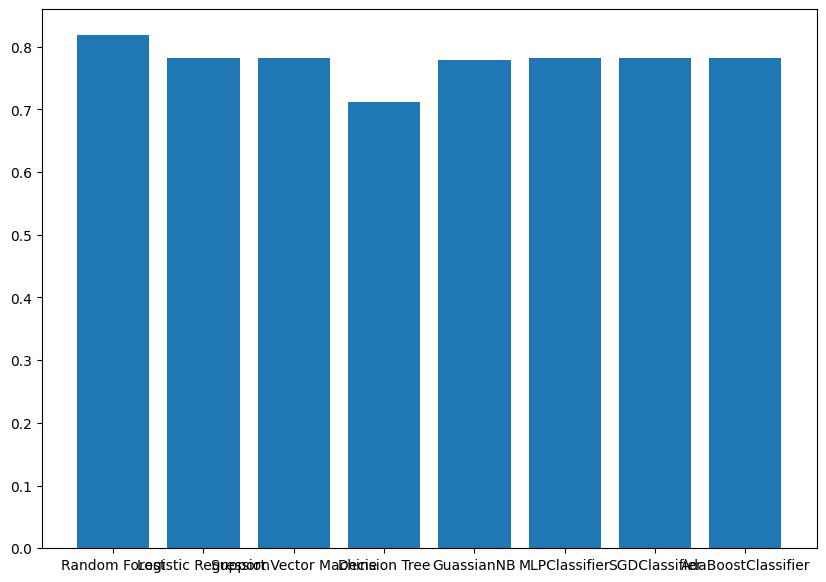

In [38]:

from matplotlib import pyplot as plt
fig = plt.figure(figsize =(10, 7))
 
# Horizontal Bar Plot
plt.bar(model_accuracy['Model'], model_accuracy['Accuracy'])
 